# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [2]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [3]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.68027207459e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [27]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.79856129989e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [70]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 4.447625e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 2.738421e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.0171436435329


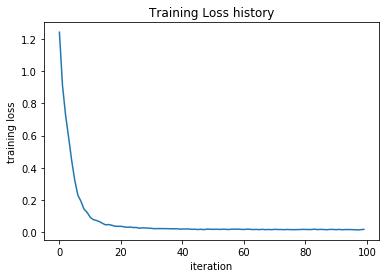

In [71]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [72]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [75]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)



iteration 0 / 1000: loss 2.302783
iteration 100 / 1000: loss 2.302294
iteration 200 / 1000: loss 2.298207
iteration 300 / 1000: loss 2.272276
iteration 400 / 1000: loss 2.158970
iteration 500 / 1000: loss 2.142634
iteration 600 / 1000: loss 2.068786
iteration 700 / 1000: loss 1.973783
iteration 800 / 1000: loss 1.948441
iteration 900 / 1000: loss 1.954843
Validation accuracy:  0.281


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

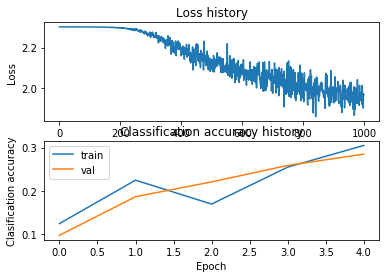

In [76]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

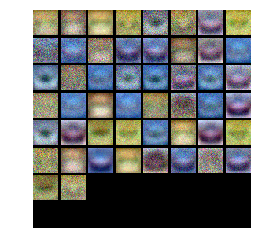

In [77]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [79]:
best_net = None # store the best model into this 
input_size = 32 * 32 * 3
num_classes = 10
best_val_acc = 0;

learning_rates = [1e-4, 5e-4, 1e-3]
hidden_sizes = [10, 25, 50, 70, 100]
regs = [0.01, 0.1, 0.2, 0.25, 0.3, 0.4]
num_iters = [1000, 2000, 5000]

for learnRate in learning_rates:
    for hiddenSize in hidden_sizes:
        for theReg in regs:
            for numIter in num_iters:
                
                net = TwoLayerNet(input_size, hiddenSize, num_classes)
                
                # Train the network
                stats = net.train(X_train, y_train, X_val, y_val,
                            num_iters=numIter, batch_size=200,
                            learning_rate=learnRate, learning_rate_decay=0.95,
                            reg=theReg, verbose=True)

                # Predict on the validation set
                val_acc = (net.predict(X_val) == y_val).mean()
                print('Validation accuracy: %f, learning_rate: %f, hidden_size: %d, regs: %f, numIter: %d' %(val_acc, learnRate, hiddenSize, theReg, numIter))
                if best_val_acc < val_acc:
                    best_val_acc= val_acc
                    best_net = net



#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
# Your code
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

iteration 0 / 1000: loss 2.302590
iteration 100 / 1000: loss 2.302536
iteration 200 / 1000: loss 2.302182
iteration 300 / 1000: loss 2.296709
iteration 400 / 1000: loss 2.256359
iteration 500 / 1000: loss 2.198699
iteration 600 / 1000: loss 2.161954
iteration 700 / 1000: loss 2.114585
iteration 800 / 1000: loss 2.040970
iteration 900 / 1000: loss 2.058488
Validation accuracy: 0.263000, learning_rate: 0.000100, hidden_size: 10, regs: 0.010000, numIter: 1000
iteration 0 / 2000: loss 2.302585
iteration 100 / 2000: loss 2.302533
iteration 200 / 2000: loss 2.301999
iteration 300 / 2000: loss 2.297419
iteration 400 / 2000: loss 2.273754
iteration 500 / 2000: loss 2.195083
iteration 600 / 2000: loss 2.113655
iteration 700 / 2000: loss 1.974565
iteration 800 / 2000: loss 2.005372
iteration 900 / 2000: loss 1.975768
iteration 1000 / 2000: loss 1.960607
iteration 1100 / 2000: loss 2.021012
iteration 1200 / 2000: loss 1.991075
iteration 1300 / 2000: loss 1.915448
iteration 1400 / 2000: loss 1.987

iteration 1300 / 5000: loss 1.938619
iteration 1400 / 5000: loss 1.943883
iteration 1500 / 5000: loss 1.846152
iteration 1600 / 5000: loss 1.892956
iteration 1700 / 5000: loss 1.923276
iteration 1800 / 5000: loss 1.886619
iteration 1900 / 5000: loss 1.876783
iteration 2000 / 5000: loss 1.903302
iteration 2100 / 5000: loss 1.856962
iteration 2200 / 5000: loss 1.825141
iteration 2300 / 5000: loss 1.797539
iteration 2400 / 5000: loss 1.829448
iteration 2500 / 5000: loss 1.798402
iteration 2600 / 5000: loss 1.800557
iteration 2700 / 5000: loss 1.870821
iteration 2800 / 5000: loss 1.738875
iteration 2900 / 5000: loss 1.782504
iteration 3000 / 5000: loss 1.839147
iteration 3100 / 5000: loss 1.791179
iteration 3200 / 5000: loss 1.796042
iteration 3300 / 5000: loss 1.863918
iteration 3400 / 5000: loss 1.762097
iteration 3500 / 5000: loss 1.764748
iteration 3600 / 5000: loss 1.765321
iteration 3700 / 5000: loss 1.834665
iteration 3800 / 5000: loss 1.769804
iteration 3900 / 5000: loss 1.733630
i

iteration 800 / 1000: loss 2.064641
iteration 900 / 1000: loss 1.988795
Validation accuracy: 0.271000, learning_rate: 0.000100, hidden_size: 10, regs: 0.400000, numIter: 1000
iteration 0 / 2000: loss 2.302647
iteration 100 / 2000: loss 2.302490
iteration 200 / 2000: loss 2.300827
iteration 300 / 2000: loss 2.281211
iteration 400 / 2000: loss 2.198538
iteration 500 / 2000: loss 2.213205
iteration 600 / 2000: loss 2.143226
iteration 700 / 2000: loss 2.126565
iteration 800 / 2000: loss 2.075648
iteration 900 / 2000: loss 2.004767
iteration 1000 / 2000: loss 1.998069
iteration 1100 / 2000: loss 2.025461
iteration 1200 / 2000: loss 1.945808
iteration 1300 / 2000: loss 1.910380
iteration 1400 / 2000: loss 1.937968
iteration 1500 / 2000: loss 2.006360
iteration 1600 / 2000: loss 1.903201
iteration 1700 / 2000: loss 1.900506
iteration 1800 / 2000: loss 1.894231
iteration 1900 / 2000: loss 1.716571
Validation accuracy: 0.338000, learning_rate: 0.000100, hidden_size: 10, regs: 0.400000, numIter:

iteration 2000 / 5000: loss 1.726235
iteration 2100 / 5000: loss 1.879090
iteration 2200 / 5000: loss 1.761172
iteration 2300 / 5000: loss 1.828078
iteration 2400 / 5000: loss 1.712760
iteration 2500 / 5000: loss 1.789152
iteration 2600 / 5000: loss 1.807528
iteration 2700 / 5000: loss 1.758565
iteration 2800 / 5000: loss 1.788788
iteration 2900 / 5000: loss 1.635928
iteration 3000 / 5000: loss 1.836565
iteration 3100 / 5000: loss 1.755033
iteration 3200 / 5000: loss 1.721310
iteration 3300 / 5000: loss 1.738417
iteration 3400 / 5000: loss 1.664304
iteration 3500 / 5000: loss 1.725422
iteration 3600 / 5000: loss 1.753389
iteration 3700 / 5000: loss 1.623458
iteration 3800 / 5000: loss 1.661195
iteration 3900 / 5000: loss 1.760497
iteration 4000 / 5000: loss 1.689903
iteration 4100 / 5000: loss 1.726218
iteration 4200 / 5000: loss 1.736286
iteration 4300 / 5000: loss 1.686023
iteration 4400 / 5000: loss 1.700037
iteration 4500 / 5000: loss 1.639680
iteration 4600 / 5000: loss 1.663152
i

iteration 200 / 2000: loss 2.301423
iteration 300 / 2000: loss 2.284176
iteration 400 / 2000: loss 2.207528
iteration 500 / 2000: loss 2.185253
iteration 600 / 2000: loss 2.110801
iteration 700 / 2000: loss 1.975078
iteration 800 / 2000: loss 2.068112
iteration 900 / 2000: loss 2.011586
iteration 1000 / 2000: loss 1.975754
iteration 1100 / 2000: loss 2.042756
iteration 1200 / 2000: loss 1.906508
iteration 1300 / 2000: loss 1.934640
iteration 1400 / 2000: loss 1.855793
iteration 1500 / 2000: loss 1.854085
iteration 1600 / 2000: loss 1.822694
iteration 1700 / 2000: loss 1.814109
iteration 1800 / 2000: loss 1.832895
iteration 1900 / 2000: loss 1.721487
Validation accuracy: 0.351000, learning_rate: 0.000100, hidden_size: 25, regs: 0.300000, numIter: 2000
iteration 0 / 5000: loss 2.302675
iteration 100 / 5000: loss 2.302272
iteration 200 / 5000: loss 2.297363
iteration 300 / 5000: loss 2.253266
iteration 400 / 5000: loss 2.242196
iteration 500 / 5000: loss 2.139644
iteration 600 / 5000: los

iteration 2700 / 5000: loss 1.743579
iteration 2800 / 5000: loss 1.918686
iteration 2900 / 5000: loss 1.698108
iteration 3000 / 5000: loss 1.632735
iteration 3100 / 5000: loss 1.729372
iteration 3200 / 5000: loss 1.607898
iteration 3300 / 5000: loss 1.643981
iteration 3400 / 5000: loss 1.733308
iteration 3500 / 5000: loss 1.730846
iteration 3600 / 5000: loss 1.700628
iteration 3700 / 5000: loss 1.655091
iteration 3800 / 5000: loss 1.463486
iteration 3900 / 5000: loss 1.724923
iteration 4000 / 5000: loss 1.640398
iteration 4100 / 5000: loss 1.728748
iteration 4200 / 5000: loss 1.699241
iteration 4300 / 5000: loss 1.702180
iteration 4400 / 5000: loss 1.773936
iteration 4500 / 5000: loss 1.625760
iteration 4600 / 5000: loss 1.635415
iteration 4700 / 5000: loss 1.721504
iteration 4800 / 5000: loss 1.633068
iteration 4900 / 5000: loss 1.627272
Validation accuracy: 0.435000, learning_rate: 0.000100, hidden_size: 50, regs: 0.010000, numIter: 5000
iteration 0 / 1000: loss 2.302648
iteration 10

iteration 900 / 2000: loss 1.947017
iteration 1000 / 2000: loss 2.006047
iteration 1100 / 2000: loss 1.890182
iteration 1200 / 2000: loss 1.874066
iteration 1300 / 2000: loss 1.844137
iteration 1400 / 2000: loss 1.877146
iteration 1500 / 2000: loss 1.964555
iteration 1600 / 2000: loss 1.804016
iteration 1700 / 2000: loss 1.810166
iteration 1800 / 2000: loss 1.824541
iteration 1900 / 2000: loss 1.674089
Validation accuracy: 0.362000, learning_rate: 0.000100, hidden_size: 50, regs: 0.250000, numIter: 2000
iteration 0 / 5000: loss 2.302763
iteration 100 / 5000: loss 2.302467
iteration 200 / 5000: loss 2.299497
iteration 300 / 5000: loss 2.268526
iteration 400 / 5000: loss 2.192185
iteration 500 / 5000: loss 2.137383
iteration 600 / 5000: loss 2.095080
iteration 700 / 5000: loss 2.105717
iteration 800 / 5000: loss 2.041720
iteration 900 / 5000: loss 1.921036
iteration 1000 / 5000: loss 2.001651
iteration 1100 / 5000: loss 1.921037
iteration 1200 / 5000: loss 1.793015
iteration 1300 / 5000:

iteration 3400 / 5000: loss 1.714571
iteration 3500 / 5000: loss 1.734104
iteration 3600 / 5000: loss 1.692074
iteration 3700 / 5000: loss 1.728754
iteration 3800 / 5000: loss 1.588479
iteration 3900 / 5000: loss 1.670801
iteration 4000 / 5000: loss 1.648160
iteration 4100 / 5000: loss 1.694214
iteration 4200 / 5000: loss 1.671854
iteration 4300 / 5000: loss 1.799687
iteration 4400 / 5000: loss 1.639767
iteration 4500 / 5000: loss 1.613751
iteration 4600 / 5000: loss 1.564234
iteration 4700 / 5000: loss 1.607799
iteration 4800 / 5000: loss 1.661842
iteration 4900 / 5000: loss 1.670692
Validation accuracy: 0.434000, learning_rate: 0.000100, hidden_size: 50, regs: 0.400000, numIter: 5000
iteration 0 / 1000: loss 2.302612
iteration 100 / 1000: loss 2.301829
iteration 200 / 1000: loss 2.296081
iteration 300 / 1000: loss 2.231687
iteration 400 / 1000: loss 2.174100
iteration 500 / 1000: loss 2.054776
iteration 600 / 1000: loss 2.050027
iteration 700 / 1000: loss 2.070975
iteration 800 / 100

iteration 1600 / 2000: loss 1.733834
iteration 1700 / 2000: loss 1.824502
iteration 1800 / 2000: loss 1.745315
iteration 1900 / 2000: loss 1.778494
Validation accuracy: 0.378000, learning_rate: 0.000100, hidden_size: 70, regs: 0.200000, numIter: 2000
iteration 0 / 5000: loss 2.302798
iteration 100 / 5000: loss 2.302069
iteration 200 / 5000: loss 2.294332
iteration 300 / 5000: loss 2.250898
iteration 400 / 5000: loss 2.159029
iteration 500 / 5000: loss 2.074906
iteration 600 / 5000: loss 2.063348
iteration 700 / 5000: loss 2.095871
iteration 800 / 5000: loss 2.013176
iteration 900 / 5000: loss 1.955075
iteration 1000 / 5000: loss 1.968758
iteration 1100 / 5000: loss 2.007944
iteration 1200 / 5000: loss 1.942195
iteration 1300 / 5000: loss 1.841916
iteration 1400 / 5000: loss 1.839705
iteration 1500 / 5000: loss 1.759580
iteration 1600 / 5000: loss 1.755896
iteration 1700 / 5000: loss 1.823954
iteration 1800 / 5000: loss 1.802561
iteration 1900 / 5000: loss 1.792132
iteration 2000 / 5000

iteration 4100 / 5000: loss 1.592619
iteration 4200 / 5000: loss 1.682921
iteration 4300 / 5000: loss 1.741859
iteration 4400 / 5000: loss 1.650254
iteration 4500 / 5000: loss 1.704219
iteration 4600 / 5000: loss 1.849129
iteration 4700 / 5000: loss 1.661284
iteration 4800 / 5000: loss 1.752320
iteration 4900 / 5000: loss 1.707851
Validation accuracy: 0.436000, learning_rate: 0.000100, hidden_size: 70, regs: 0.300000, numIter: 5000
iteration 0 / 1000: loss 2.303036
iteration 100 / 1000: loss 2.302559
iteration 200 / 1000: loss 2.298657
iteration 300 / 1000: loss 2.251843
iteration 400 / 1000: loss 2.176481
iteration 500 / 1000: loss 2.111461
iteration 600 / 1000: loss 2.084481
iteration 700 / 1000: loss 2.022631
iteration 800 / 1000: loss 1.973717
iteration 900 / 1000: loss 1.964446
Validation accuracy: 0.286000, learning_rate: 0.000100, hidden_size: 70, regs: 0.400000, numIter: 1000
iteration 0 / 2000: loss 2.303026
iteration 100 / 2000: loss 2.302560
iteration 200 / 2000: loss 2.2980

iteration 100 / 5000: loss 2.301938
iteration 200 / 5000: loss 2.291761
iteration 300 / 5000: loss 2.241946
iteration 400 / 5000: loss 2.193530
iteration 500 / 5000: loss 2.154735
iteration 600 / 5000: loss 1.977349
iteration 700 / 5000: loss 1.957519
iteration 800 / 5000: loss 2.015421
iteration 900 / 5000: loss 2.015633
iteration 1000 / 5000: loss 1.953968
iteration 1100 / 5000: loss 1.923735
iteration 1200 / 5000: loss 2.017635
iteration 1300 / 5000: loss 1.973139
iteration 1400 / 5000: loss 1.922260
iteration 1500 / 5000: loss 1.805911
iteration 1600 / 5000: loss 1.822030
iteration 1700 / 5000: loss 1.780182
iteration 1800 / 5000: loss 1.778736
iteration 1900 / 5000: loss 1.740608
iteration 2000 / 5000: loss 1.764062
iteration 2100 / 5000: loss 1.746890
iteration 2200 / 5000: loss 1.701651
iteration 2300 / 5000: loss 1.818022
iteration 2400 / 5000: loss 1.642501
iteration 2500 / 5000: loss 1.763290
iteration 2600 / 5000: loss 1.739764
iteration 2700 / 5000: loss 1.904715
iteration 

iteration 4800 / 5000: loss 1.554694
iteration 4900 / 5000: loss 1.599170
Validation accuracy: 0.441000, learning_rate: 0.000100, hidden_size: 100, regs: 0.250000, numIter: 5000
iteration 0 / 1000: loss 2.303051
iteration 100 / 1000: loss 2.302278
iteration 200 / 1000: loss 2.294958
iteration 300 / 1000: loss 2.258607
iteration 400 / 1000: loss 2.167755
iteration 500 / 1000: loss 2.109803
iteration 600 / 1000: loss 2.068678
iteration 700 / 1000: loss 1.966351
iteration 800 / 1000: loss 2.027715
iteration 900 / 1000: loss 1.990351
Validation accuracy: 0.304000, learning_rate: 0.000100, hidden_size: 100, regs: 0.300000, numIter: 1000
iteration 0 / 2000: loss 2.303032
iteration 100 / 2000: loss 2.302161
iteration 200 / 2000: loss 2.290507
iteration 300 / 2000: loss 2.247149
iteration 400 / 2000: loss 2.128547
iteration 500 / 2000: loss 2.080990
iteration 600 / 2000: loss 2.060309
iteration 700 / 2000: loss 2.059802
iteration 800 / 2000: loss 2.057267
iteration 900 / 2000: loss 1.978380
it

iteration 800 / 5000: loss 1.742592
iteration 900 / 5000: loss 1.703481
iteration 1000 / 5000: loss 1.661637
iteration 1100 / 5000: loss 1.779565
iteration 1200 / 5000: loss 1.723250
iteration 1300 / 5000: loss 1.765695
iteration 1400 / 5000: loss 1.739008
iteration 1500 / 5000: loss 1.699730
iteration 1600 / 5000: loss 1.666645
iteration 1700 / 5000: loss 1.724682
iteration 1800 / 5000: loss 1.730421
iteration 1900 / 5000: loss 1.583246
iteration 2000 / 5000: loss 1.678579
iteration 2100 / 5000: loss 1.680088
iteration 2200 / 5000: loss 1.662177
iteration 2300 / 5000: loss 1.613383
iteration 2400 / 5000: loss 1.764331
iteration 2500 / 5000: loss 1.446795
iteration 2600 / 5000: loss 1.584557
iteration 2700 / 5000: loss 1.679311
iteration 2800 / 5000: loss 1.654086
iteration 2900 / 5000: loss 1.604065
iteration 3000 / 5000: loss 1.640700
iteration 3100 / 5000: loss 1.654487
iteration 3200 / 5000: loss 1.719883
iteration 3300 / 5000: loss 1.658183
iteration 3400 / 5000: loss 1.580536
ite

iteration 300 / 1000: loss 1.902156
iteration 400 / 1000: loss 1.747042
iteration 500 / 1000: loss 1.891654
iteration 600 / 1000: loss 1.782517
iteration 700 / 1000: loss 1.829710
iteration 800 / 1000: loss 1.865513
iteration 900 / 1000: loss 1.761543
Validation accuracy: 0.400000, learning_rate: 0.000500, hidden_size: 10, regs: 0.250000, numIter: 1000
iteration 0 / 2000: loss 2.302613
iteration 100 / 2000: loss 2.101727
iteration 200 / 2000: loss 2.009767
iteration 300 / 2000: loss 1.795446
iteration 400 / 2000: loss 1.793453
iteration 500 / 2000: loss 1.775659
iteration 600 / 2000: loss 1.763585
iteration 700 / 2000: loss 1.719220
iteration 800 / 2000: loss 1.620864
iteration 900 / 2000: loss 1.769660
iteration 1000 / 2000: loss 1.701027
iteration 1100 / 2000: loss 1.694814
iteration 1200 / 2000: loss 1.673610
iteration 1300 / 2000: loss 1.758446
iteration 1400 / 2000: loss 1.661917
iteration 1500 / 2000: loss 1.619523
iteration 1600 / 2000: loss 1.633737
iteration 1700 / 2000: loss 

iteration 1500 / 5000: loss 1.681847
iteration 1600 / 5000: loss 1.599926
iteration 1700 / 5000: loss 1.504117
iteration 1800 / 5000: loss 1.637658
iteration 1900 / 5000: loss 1.718455
iteration 2000 / 5000: loss 1.587678
iteration 2100 / 5000: loss 1.673941
iteration 2200 / 5000: loss 1.524551
iteration 2300 / 5000: loss 1.643037
iteration 2400 / 5000: loss 1.698523
iteration 2500 / 5000: loss 1.622261
iteration 2600 / 5000: loss 1.601977
iteration 2700 / 5000: loss 1.796314
iteration 2800 / 5000: loss 1.632371
iteration 2900 / 5000: loss 1.733560
iteration 3000 / 5000: loss 1.622237
iteration 3100 / 5000: loss 1.666291
iteration 3200 / 5000: loss 1.595703
iteration 3300 / 5000: loss 1.588058
iteration 3400 / 5000: loss 1.759163
iteration 3500 / 5000: loss 1.613506
iteration 3600 / 5000: loss 1.702075
iteration 3700 / 5000: loss 1.534579
iteration 3800 / 5000: loss 1.585819
iteration 3900 / 5000: loss 1.786268
iteration 4000 / 5000: loss 1.738891
iteration 4100 / 5000: loss 1.744026
i

Validation accuracy: 0.432000, learning_rate: 0.000500, hidden_size: 25, regs: 0.200000, numIter: 1000
iteration 0 / 2000: loss 2.302668
iteration 100 / 2000: loss 2.112703
iteration 200 / 2000: loss 1.951806
iteration 300 / 2000: loss 1.732882
iteration 400 / 2000: loss 1.774095
iteration 500 / 2000: loss 1.846469
iteration 600 / 2000: loss 1.730317
iteration 700 / 2000: loss 1.472740
iteration 800 / 2000: loss 1.692030
iteration 900 / 2000: loss 1.654345
iteration 1000 / 2000: loss 1.535862
iteration 1100 / 2000: loss 1.526974
iteration 1200 / 2000: loss 1.573192
iteration 1300 / 2000: loss 1.566560
iteration 1400 / 2000: loss 1.489778
iteration 1500 / 2000: loss 1.526289
iteration 1600 / 2000: loss 1.552250
iteration 1700 / 2000: loss 1.728504
iteration 1800 / 2000: loss 1.555699
iteration 1900 / 2000: loss 1.518477
Validation accuracy: 0.455000, learning_rate: 0.000500, hidden_size: 25, regs: 0.200000, numIter: 2000
iteration 0 / 5000: loss 2.302671
iteration 100 / 5000: loss 2.136

iteration 2200 / 5000: loss 1.598920
iteration 2300 / 5000: loss 1.541939
iteration 2400 / 5000: loss 1.557854
iteration 2500 / 5000: loss 1.480345
iteration 2600 / 5000: loss 1.448958
iteration 2700 / 5000: loss 1.377211
iteration 2800 / 5000: loss 1.462458
iteration 2900 / 5000: loss 1.566148
iteration 3000 / 5000: loss 1.510118
iteration 3100 / 5000: loss 1.432425
iteration 3200 / 5000: loss 1.312669
iteration 3300 / 5000: loss 1.515202
iteration 3400 / 5000: loss 1.517384
iteration 3500 / 5000: loss 1.328244
iteration 3600 / 5000: loss 1.504041
iteration 3700 / 5000: loss 1.413090
iteration 3800 / 5000: loss 1.554778
iteration 3900 / 5000: loss 1.414202
iteration 4000 / 5000: loss 1.523754
iteration 4100 / 5000: loss 1.524034
iteration 4200 / 5000: loss 1.535563
iteration 4300 / 5000: loss 1.283577
iteration 4400 / 5000: loss 1.382355
iteration 4500 / 5000: loss 1.456393
iteration 4600 / 5000: loss 1.355851
iteration 4700 / 5000: loss 1.443427
iteration 4800 / 5000: loss 1.466228
i

iteration 400 / 2000: loss 1.808558
iteration 500 / 2000: loss 1.689360
iteration 600 / 2000: loss 1.707245
iteration 700 / 2000: loss 1.737245
iteration 800 / 2000: loss 1.591212
iteration 900 / 2000: loss 1.625996
iteration 1000 / 2000: loss 1.501375
iteration 1100 / 2000: loss 1.542411
iteration 1200 / 2000: loss 1.522619
iteration 1300 / 2000: loss 1.488998
iteration 1400 / 2000: loss 1.467836
iteration 1500 / 2000: loss 1.670348
iteration 1600 / 2000: loss 1.503280
iteration 1700 / 2000: loss 1.450525
iteration 1800 / 2000: loss 1.392306
iteration 1900 / 2000: loss 1.523505
Validation accuracy: 0.486000, learning_rate: 0.000500, hidden_size: 50, regs: 0.100000, numIter: 2000
iteration 0 / 5000: loss 2.302664
iteration 100 / 5000: loss 2.098507
iteration 200 / 5000: loss 1.890932
iteration 300 / 5000: loss 1.784849
iteration 400 / 5000: loss 1.813164
iteration 500 / 5000: loss 1.758473
iteration 600 / 5000: loss 1.745480
iteration 700 / 5000: loss 1.739144
iteration 800 / 5000: los

iteration 2900 / 5000: loss 1.314291
iteration 3000 / 5000: loss 1.454691
iteration 3100 / 5000: loss 1.236732
iteration 3200 / 5000: loss 1.470717
iteration 3300 / 5000: loss 1.313201
iteration 3400 / 5000: loss 1.486894
iteration 3500 / 5000: loss 1.433201
iteration 3600 / 5000: loss 1.407967
iteration 3700 / 5000: loss 1.258677
iteration 3800 / 5000: loss 1.414958
iteration 3900 / 5000: loss 1.223679
iteration 4000 / 5000: loss 1.322710
iteration 4100 / 5000: loss 1.311896
iteration 4200 / 5000: loss 1.339215
iteration 4300 / 5000: loss 1.297795
iteration 4400 / 5000: loss 1.404165
iteration 4500 / 5000: loss 1.230481
iteration 4600 / 5000: loss 1.288136
iteration 4700 / 5000: loss 1.261973
iteration 4800 / 5000: loss 1.365946
iteration 4900 / 5000: loss 1.330996
Validation accuracy: 0.509000, learning_rate: 0.000500, hidden_size: 50, regs: 0.250000, numIter: 5000
iteration 0 / 1000: loss 2.302807
iteration 100 / 1000: loss 2.093379
iteration 200 / 1000: loss 1.882729
iteration 300 

iteration 1100 / 2000: loss 1.611760
iteration 1200 / 2000: loss 1.479190
iteration 1300 / 2000: loss 1.510110
iteration 1400 / 2000: loss 1.419297
iteration 1500 / 2000: loss 1.468266
iteration 1600 / 2000: loss 1.469397
iteration 1700 / 2000: loss 1.415873
iteration 1800 / 2000: loss 1.471263
iteration 1900 / 2000: loss 1.524061
Validation accuracy: 0.490000, learning_rate: 0.000500, hidden_size: 70, regs: 0.010000, numIter: 2000
iteration 0 / 5000: loss 2.302613
iteration 100 / 5000: loss 2.210616
iteration 200 / 5000: loss 1.916763
iteration 300 / 5000: loss 1.867712
iteration 400 / 5000: loss 1.801197
iteration 500 / 5000: loss 1.735846
iteration 600 / 5000: loss 1.608512
iteration 700 / 5000: loss 1.535683
iteration 800 / 5000: loss 1.671538
iteration 900 / 5000: loss 1.575886
iteration 1000 / 5000: loss 1.605113
iteration 1100 / 5000: loss 1.549326
iteration 1200 / 5000: loss 1.482332
iteration 1300 / 5000: loss 1.472117
iteration 1400 / 5000: loss 1.587159
iteration 1500 / 5000

iteration 3600 / 5000: loss 1.251405
iteration 3700 / 5000: loss 1.358153
iteration 3800 / 5000: loss 1.360374
iteration 3900 / 5000: loss 1.239418
iteration 4000 / 5000: loss 1.438649
iteration 4100 / 5000: loss 1.276955
iteration 4200 / 5000: loss 1.397753
iteration 4300 / 5000: loss 1.446487
iteration 4400 / 5000: loss 1.327584
iteration 4500 / 5000: loss 1.440483
iteration 4600 / 5000: loss 1.286282
iteration 4700 / 5000: loss 1.385423
iteration 4800 / 5000: loss 1.327763
iteration 4900 / 5000: loss 1.432066
Validation accuracy: 0.521000, learning_rate: 0.000500, hidden_size: 70, regs: 0.200000, numIter: 5000
iteration 0 / 1000: loss 2.302832
iteration 100 / 1000: loss 2.121791
iteration 200 / 1000: loss 1.959142
iteration 300 / 1000: loss 1.726017
iteration 400 / 1000: loss 1.798698
iteration 500 / 1000: loss 1.798562
iteration 600 / 1000: loss 1.735337
iteration 700 / 1000: loss 1.723792
iteration 800 / 1000: loss 1.599476
iteration 900 / 1000: loss 1.518708
Validation accuracy: 

iteration 1800 / 2000: loss 1.487378
iteration 1900 / 2000: loss 1.582556
Validation accuracy: 0.473000, learning_rate: 0.000500, hidden_size: 70, regs: 0.400000, numIter: 2000
iteration 0 / 5000: loss 2.303020
iteration 100 / 5000: loss 2.139070
iteration 200 / 5000: loss 1.896348
iteration 300 / 5000: loss 1.840148
iteration 400 / 5000: loss 1.793655
iteration 500 / 5000: loss 1.749306
iteration 600 / 5000: loss 1.667210
iteration 700 / 5000: loss 1.698015
iteration 800 / 5000: loss 1.571291
iteration 900 / 5000: loss 1.525953
iteration 1000 / 5000: loss 1.557688
iteration 1100 / 5000: loss 1.502353
iteration 1200 / 5000: loss 1.521378
iteration 1300 / 5000: loss 1.574031
iteration 1400 / 5000: loss 1.472374
iteration 1500 / 5000: loss 1.563753
iteration 1600 / 5000: loss 1.518279
iteration 1700 / 5000: loss 1.458907
iteration 1800 / 5000: loss 1.476241
iteration 1900 / 5000: loss 1.533379
iteration 2000 / 5000: loss 1.554215
iteration 2100 / 5000: loss 1.633326
iteration 2200 / 5000

iteration 4300 / 5000: loss 1.207124
iteration 4400 / 5000: loss 1.232698
iteration 4500 / 5000: loss 1.251487
iteration 4600 / 5000: loss 1.203504
iteration 4700 / 5000: loss 1.209373
iteration 4800 / 5000: loss 1.210639
iteration 4900 / 5000: loss 1.206779
Validation accuracy: 0.521000, learning_rate: 0.000500, hidden_size: 100, regs: 0.100000, numIter: 5000
iteration 0 / 1000: loss 2.302851
iteration 100 / 1000: loss 2.072420
iteration 200 / 1000: loss 1.921513
iteration 300 / 1000: loss 1.852592
iteration 400 / 1000: loss 1.832030
iteration 500 / 1000: loss 1.624772
iteration 600 / 1000: loss 1.707145
iteration 700 / 1000: loss 1.624010
iteration 800 / 1000: loss 1.677201
iteration 900 / 1000: loss 1.474507
Validation accuracy: 0.458000, learning_rate: 0.000500, hidden_size: 100, regs: 0.200000, numIter: 1000
iteration 0 / 2000: loss 2.302860
iteration 100 / 2000: loss 2.168944
iteration 200 / 2000: loss 1.847606
iteration 300 / 2000: loss 1.818564
iteration 400 / 2000: loss 1.6931

iteration 200 / 5000: loss 1.956391
iteration 300 / 5000: loss 1.855007
iteration 400 / 5000: loss 1.746479
iteration 500 / 5000: loss 1.653447
iteration 600 / 5000: loss 1.673804
iteration 700 / 5000: loss 1.636263
iteration 800 / 5000: loss 1.646672
iteration 900 / 5000: loss 1.711071
iteration 1000 / 5000: loss 1.592871
iteration 1100 / 5000: loss 1.558603
iteration 1200 / 5000: loss 1.495224
iteration 1300 / 5000: loss 1.518573
iteration 1400 / 5000: loss 1.571502
iteration 1500 / 5000: loss 1.399045
iteration 1600 / 5000: loss 1.431110
iteration 1700 / 5000: loss 1.576841
iteration 1800 / 5000: loss 1.456008
iteration 1900 / 5000: loss 1.428467
iteration 2000 / 5000: loss 1.323306
iteration 2100 / 5000: loss 1.401989
iteration 2200 / 5000: loss 1.444279
iteration 2300 / 5000: loss 1.426072
iteration 2400 / 5000: loss 1.565663
iteration 2500 / 5000: loss 1.452942
iteration 2600 / 5000: loss 1.388576
iteration 2700 / 5000: loss 1.453308
iteration 2800 / 5000: loss 1.422751
iteration

iteration 4900 / 5000: loss 1.625930
Validation accuracy: 0.422000, learning_rate: 0.001000, hidden_size: 10, regs: 0.010000, numIter: 5000
iteration 0 / 1000: loss 2.302594
iteration 100 / 1000: loss 1.958561
iteration 200 / 1000: loss 1.860539
iteration 300 / 1000: loss 1.799045
iteration 400 / 1000: loss 1.767826
iteration 500 / 1000: loss 1.717160
iteration 600 / 1000: loss 1.641712
iteration 700 / 1000: loss 1.691190
iteration 800 / 1000: loss 1.710528
iteration 900 / 1000: loss 1.773354
Validation accuracy: 0.393000, learning_rate: 0.001000, hidden_size: 10, regs: 0.100000, numIter: 1000
iteration 0 / 2000: loss 2.302596
iteration 100 / 2000: loss 2.015366
iteration 200 / 2000: loss 1.860973
iteration 300 / 2000: loss 1.678275
iteration 400 / 2000: loss 1.630506
iteration 500 / 2000: loss 1.850835
iteration 600 / 2000: loss 1.782439
iteration 700 / 2000: loss 1.790234
iteration 800 / 2000: loss 1.637706
iteration 900 / 2000: loss 1.816096
iteration 1000 / 2000: loss 1.708052
iter

iteration 900 / 5000: loss 1.510004
iteration 1000 / 5000: loss 1.638491
iteration 1100 / 5000: loss 1.695449
iteration 1200 / 5000: loss 1.650317
iteration 1300 / 5000: loss 1.709128
iteration 1400 / 5000: loss 1.574185
iteration 1500 / 5000: loss 1.661732
iteration 1600 / 5000: loss 1.622344
iteration 1700 / 5000: loss 1.583038
iteration 1800 / 5000: loss 1.588394
iteration 1900 / 5000: loss 1.750453
iteration 2000 / 5000: loss 1.616909
iteration 2100 / 5000: loss 1.518308
iteration 2200 / 5000: loss 1.689865
iteration 2300 / 5000: loss 1.612455
iteration 2400 / 5000: loss 1.638171
iteration 2500 / 5000: loss 1.703315
iteration 2600 / 5000: loss 1.665647
iteration 2700 / 5000: loss 1.708185
iteration 2800 / 5000: loss 1.571466
iteration 2900 / 5000: loss 1.577788
iteration 3000 / 5000: loss 1.641168
iteration 3100 / 5000: loss 1.580205
iteration 3200 / 5000: loss 1.643651
iteration 3300 / 5000: loss 1.717826
iteration 3400 / 5000: loss 1.729216
iteration 3500 / 5000: loss 1.568695
it

iteration 400 / 1000: loss 1.707517
iteration 500 / 1000: loss 1.519171
iteration 600 / 1000: loss 1.679157
iteration 700 / 1000: loss 1.652288
iteration 800 / 1000: loss 1.524404
iteration 900 / 1000: loss 1.550188
Validation accuracy: 0.436000, learning_rate: 0.001000, hidden_size: 25, regs: 0.010000, numIter: 1000
iteration 0 / 2000: loss 2.302565
iteration 100 / 2000: loss 1.984223
iteration 200 / 2000: loss 1.840467
iteration 300 / 2000: loss 1.815762
iteration 400 / 2000: loss 1.595290
iteration 500 / 2000: loss 1.728752
iteration 600 / 2000: loss 1.523744
iteration 700 / 2000: loss 1.530963
iteration 800 / 2000: loss 1.461952
iteration 900 / 2000: loss 1.437949
iteration 1000 / 2000: loss 1.460235
iteration 1100 / 2000: loss 1.430238
iteration 1200 / 2000: loss 1.506677
iteration 1300 / 2000: loss 1.426009
iteration 1400 / 2000: loss 1.496908
iteration 1500 / 2000: loss 1.517591
iteration 1600 / 2000: loss 1.511582
iteration 1700 / 2000: loss 1.284984
iteration 1800 / 2000: loss

iteration 1600 / 5000: loss 1.465224
iteration 1700 / 5000: loss 1.403186
iteration 1800 / 5000: loss 1.523911
iteration 1900 / 5000: loss 1.493388
iteration 2000 / 5000: loss 1.450488
iteration 2100 / 5000: loss 1.418297
iteration 2200 / 5000: loss 1.585972
iteration 2300 / 5000: loss 1.423032
iteration 2400 / 5000: loss 1.600887
iteration 2500 / 5000: loss 1.460047
iteration 2600 / 5000: loss 1.525648
iteration 2700 / 5000: loss 1.499354
iteration 2800 / 5000: loss 1.379531
iteration 2900 / 5000: loss 1.399107
iteration 3000 / 5000: loss 1.511130
iteration 3100 / 5000: loss 1.448596
iteration 3200 / 5000: loss 1.392427
iteration 3300 / 5000: loss 1.396643
iteration 3400 / 5000: loss 1.436115
iteration 3500 / 5000: loss 1.415581
iteration 3600 / 5000: loss 1.543499
iteration 3700 / 5000: loss 1.428922
iteration 3800 / 5000: loss 1.389548
iteration 3900 / 5000: loss 1.447386
iteration 4000 / 5000: loss 1.549218
iteration 4100 / 5000: loss 1.298057
iteration 4200 / 5000: loss 1.325422
i

iteration 100 / 2000: loss 2.018423
iteration 200 / 2000: loss 1.822203
iteration 300 / 2000: loss 1.693815
iteration 400 / 2000: loss 1.669205
iteration 500 / 2000: loss 1.791672
iteration 600 / 2000: loss 1.627410
iteration 700 / 2000: loss 1.494956
iteration 800 / 2000: loss 1.464638
iteration 900 / 2000: loss 1.422362
iteration 1000 / 2000: loss 1.410507
iteration 1100 / 2000: loss 1.686201
iteration 1200 / 2000: loss 1.558309
iteration 1300 / 2000: loss 1.569134
iteration 1400 / 2000: loss 1.491328
iteration 1500 / 2000: loss 1.510200
iteration 1600 / 2000: loss 1.473440
iteration 1700 / 2000: loss 1.304747
iteration 1800 / 2000: loss 1.625502
iteration 1900 / 2000: loss 1.587898
Validation accuracy: 0.480000, learning_rate: 0.001000, hidden_size: 25, regs: 0.400000, numIter: 2000
iteration 0 / 5000: loss 2.302743
iteration 100 / 5000: loss 2.020794
iteration 200 / 5000: loss 1.830343
iteration 300 / 5000: loss 1.716725
iteration 400 / 5000: loss 1.704115
iteration 500 / 5000: los

iteration 2600 / 5000: loss 1.269392
iteration 2700 / 5000: loss 1.271859
iteration 2800 / 5000: loss 1.303641
iteration 2900 / 5000: loss 1.384417
iteration 3000 / 5000: loss 1.341922
iteration 3100 / 5000: loss 1.279515
iteration 3200 / 5000: loss 1.281607
iteration 3300 / 5000: loss 1.393606
iteration 3400 / 5000: loss 1.245250
iteration 3500 / 5000: loss 1.363186
iteration 3600 / 5000: loss 1.380250
iteration 3700 / 5000: loss 1.106677
iteration 3800 / 5000: loss 1.432584
iteration 3900 / 5000: loss 1.311273
iteration 4000 / 5000: loss 1.264571
iteration 4100 / 5000: loss 1.191160
iteration 4200 / 5000: loss 1.236164
iteration 4300 / 5000: loss 1.184331
iteration 4400 / 5000: loss 1.273026
iteration 4500 / 5000: loss 1.174147
iteration 4600 / 5000: loss 1.324593
iteration 4700 / 5000: loss 1.156608
iteration 4800 / 5000: loss 1.225762
iteration 4900 / 5000: loss 1.395550
Validation accuracy: 0.511000, learning_rate: 0.001000, hidden_size: 50, regs: 0.100000, numIter: 5000
iteration

iteration 800 / 2000: loss 1.456739
iteration 900 / 2000: loss 1.495692
iteration 1000 / 2000: loss 1.484087
iteration 1100 / 2000: loss 1.628145
iteration 1200 / 2000: loss 1.562549
iteration 1300 / 2000: loss 1.489515
iteration 1400 / 2000: loss 1.404054
iteration 1500 / 2000: loss 1.444533
iteration 1600 / 2000: loss 1.467998
iteration 1700 / 2000: loss 1.539334
iteration 1800 / 2000: loss 1.344043
iteration 1900 / 2000: loss 1.578670
Validation accuracy: 0.497000, learning_rate: 0.001000, hidden_size: 50, regs: 0.300000, numIter: 2000
iteration 0 / 5000: loss 2.302838
iteration 100 / 5000: loss 2.044338
iteration 200 / 5000: loss 1.783525
iteration 300 / 5000: loss 1.795085
iteration 400 / 5000: loss 1.668547
iteration 500 / 5000: loss 1.574372
iteration 600 / 5000: loss 1.554966
iteration 700 / 5000: loss 1.496250
iteration 800 / 5000: loss 1.506924
iteration 900 / 5000: loss 1.640304
iteration 1000 / 5000: loss 1.523462
iteration 1100 / 5000: loss 1.505793
iteration 1200 / 5000: 

iteration 3300 / 5000: loss 1.150682
iteration 3400 / 5000: loss 1.329988
iteration 3500 / 5000: loss 1.186725
iteration 3600 / 5000: loss 1.267204
iteration 3700 / 5000: loss 1.262744
iteration 3800 / 5000: loss 1.242724
iteration 3900 / 5000: loss 1.087389
iteration 4000 / 5000: loss 1.238958
iteration 4100 / 5000: loss 1.098855
iteration 4200 / 5000: loss 1.188466
iteration 4300 / 5000: loss 1.128808
iteration 4400 / 5000: loss 1.379847
iteration 4500 / 5000: loss 1.129774
iteration 4600 / 5000: loss 1.164613
iteration 4700 / 5000: loss 1.228915
iteration 4800 / 5000: loss 1.142076
iteration 4900 / 5000: loss 0.981152
Validation accuracy: 0.513000, learning_rate: 0.001000, hidden_size: 70, regs: 0.010000, numIter: 5000
iteration 0 / 1000: loss 2.302696
iteration 100 / 1000: loss 1.871561
iteration 200 / 1000: loss 1.641753
iteration 300 / 1000: loss 1.669368
iteration 400 / 1000: loss 1.629821
iteration 500 / 1000: loss 1.598474
iteration 600 / 1000: loss 1.503950
iteration 700 / 10

iteration 1500 / 2000: loss 1.480679
iteration 1600 / 2000: loss 1.429972
iteration 1700 / 2000: loss 1.346802
iteration 1800 / 2000: loss 1.501817
iteration 1900 / 2000: loss 1.458685
Validation accuracy: 0.514000, learning_rate: 0.001000, hidden_size: 70, regs: 0.250000, numIter: 2000
iteration 0 / 5000: loss 2.302851
iteration 100 / 5000: loss 2.015384
iteration 200 / 5000: loss 1.707481
iteration 300 / 5000: loss 1.765698
iteration 400 / 5000: loss 1.777184
iteration 500 / 5000: loss 1.527461
iteration 600 / 5000: loss 1.563656
iteration 700 / 5000: loss 1.473068
iteration 800 / 5000: loss 1.608363
iteration 900 / 5000: loss 1.511427
iteration 1000 / 5000: loss 1.549499
iteration 1100 / 5000: loss 1.408902
iteration 1200 / 5000: loss 1.484860
iteration 1300 / 5000: loss 1.462916
iteration 1400 / 5000: loss 1.375706
iteration 1500 / 5000: loss 1.558272
iteration 1600 / 5000: loss 1.544260
iteration 1700 / 5000: loss 1.516169
iteration 1800 / 5000: loss 1.367455
iteration 1900 / 5000

iteration 4000 / 5000: loss 1.331181
iteration 4100 / 5000: loss 1.262648
iteration 4200 / 5000: loss 1.337085
iteration 4300 / 5000: loss 1.235670
iteration 4400 / 5000: loss 1.181175
iteration 4500 / 5000: loss 1.351705
iteration 4600 / 5000: loss 1.327810
iteration 4700 / 5000: loss 1.332195
iteration 4800 / 5000: loss 1.336830
iteration 4900 / 5000: loss 1.277333
Validation accuracy: 0.522000, learning_rate: 0.001000, hidden_size: 70, regs: 0.400000, numIter: 5000
iteration 0 / 1000: loss 2.302603
iteration 100 / 1000: loss 1.878325
iteration 200 / 1000: loss 1.757710
iteration 300 / 1000: loss 1.567082
iteration 400 / 1000: loss 1.375545
iteration 500 / 1000: loss 1.546829
iteration 600 / 1000: loss 1.595582
iteration 700 / 1000: loss 1.562083
iteration 800 / 1000: loss 1.437695
iteration 900 / 1000: loss 1.464743
Validation accuracy: 0.485000, learning_rate: 0.001000, hidden_size: 100, regs: 0.010000, numIter: 1000
iteration 0 / 2000: loss 2.302587
iteration 100 / 2000: loss 1.94

iteration 100 / 5000: loss 1.903593
iteration 200 / 5000: loss 1.787161
iteration 300 / 5000: loss 1.664584
iteration 400 / 5000: loss 1.613226
iteration 500 / 5000: loss 1.520967
iteration 600 / 5000: loss 1.548318
iteration 700 / 5000: loss 1.386886
iteration 800 / 5000: loss 1.532204
iteration 900 / 5000: loss 1.472383
iteration 1000 / 5000: loss 1.349152
iteration 1100 / 5000: loss 1.401334
iteration 1200 / 5000: loss 1.532935
iteration 1300 / 5000: loss 1.472539
iteration 1400 / 5000: loss 1.442031
iteration 1500 / 5000: loss 1.324437
iteration 1600 / 5000: loss 1.326101
iteration 1700 / 5000: loss 1.424151
iteration 1800 / 5000: loss 1.460209
iteration 1900 / 5000: loss 1.290473
iteration 2000 / 5000: loss 1.310586
iteration 2100 / 5000: loss 1.213913
iteration 2200 / 5000: loss 1.323746
iteration 2300 / 5000: loss 1.360658
iteration 2400 / 5000: loss 1.323434
iteration 2500 / 5000: loss 1.346816
iteration 2600 / 5000: loss 1.368164
iteration 2700 / 5000: loss 1.353259
iteration 

iteration 4800 / 5000: loss 1.190486
iteration 4900 / 5000: loss 1.175765
Validation accuracy: 0.519000, learning_rate: 0.001000, hidden_size: 100, regs: 0.300000, numIter: 5000
iteration 0 / 1000: loss 2.303216
iteration 100 / 1000: loss 1.902329
iteration 200 / 1000: loss 1.724442
iteration 300 / 1000: loss 1.621458
iteration 400 / 1000: loss 1.593509
iteration 500 / 1000: loss 1.641863
iteration 600 / 1000: loss 1.423817
iteration 700 / 1000: loss 1.605845
iteration 800 / 1000: loss 1.606700
iteration 900 / 1000: loss 1.531389
Validation accuracy: 0.466000, learning_rate: 0.001000, hidden_size: 100, regs: 0.400000, numIter: 1000
iteration 0 / 2000: loss 2.303157
iteration 100 / 2000: loss 1.849984
iteration 200 / 2000: loss 1.861543
iteration 300 / 2000: loss 1.550793
iteration 400 / 2000: loss 1.671156
iteration 500 / 2000: loss 1.560226
iteration 600 / 2000: loss 1.639063
iteration 700 / 2000: loss 1.431776
iteration 800 / 2000: loss 1.530041
iteration 900 / 2000: loss 1.612141
it

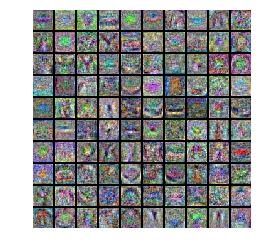

In [80]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [81]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.53


**Inline Question**

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.
1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

*Your answer*:

*Your explanation:*